In [1]:
import pandas as pd
import numpy as np
import MarineDNA as md
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [213]:
#file1 = "../../../Data/Flyer2018_16S_table_counts.tsv"
#asvs1 = pd.read_csv(file1, index_col=0, sep="\t")

# merged data:
file1 = "../../../Data/merged_data/no_duplicates/Merged2018_16S_otu_filtered.csv"
asvs1 = pd.read_csv(file1, index_col=0)
asvs1.head()

CN18Fc43_5_eDNA  CN18FESPkoa_SC58  CN18FESPkoa_SC43  CN18FESPkoa_SC40  \
ASV_1           2830.0            3158.0            2985.0            3624.0   
ASV_2           8609.0            8452.0           10441.0           11390.0   
ASV_3           2302.0            1954.0            2657.0            3248.0   
ASV_4             54.0              76.0              88.0             105.0   
ASV_5            405.0             460.0             523.0             600.0   

       CN18FESPkoa_SC37  CN18FESPkoa_SC34  CN18FESPkoa_SC32  CN18FESPkoa_SC31  \
ASV_1            1463.0            2477.0            2769.0            3387.0   
ASV_2            3521.0            8490.0            8995.0            8635.0   
ASV_3             900.0            2008.0            2286.0            2695.0   
ASV_4              35.0              59.0              57.0              74.0   
ASV_5             247.0             457.0             437.0             567.0   

       CN18FESPkoa_SC29  CN18FESPkoa_SC26  ...  Lasker18Sc134_3  \
ASV_1            2750.0            2639.0  ...           4345.0   
ASV_2            9106.0            8983.0  ...              0.0   
ASV_3            2029.0            2887.0  ...           4478.0   
ASV_4              62.0              78.0  ...           1963.0   
ASV_5             292.0             450.0  ...            939.0   

       Lasker18Sc150_3  Lasker18Sc134_5  Lasker18Sc135_19  Lasker18Sc145_17  \
ASV_1           7210.0           7698.0              19.0              47.0   
ASV_2             76.0             50.0               0.0               0.0   
ASV_3           2267.0           7664.0              21.0              88.0   
ASV_4            533.0           3499.0            4612.0            2680.0   
ASV_5            246.0           1922.0             712.0            1015.0   

       Lasker18Sc145_19  Lasker18Sc145_3  Lasker18Sc145_5  Lasker18Sc150_17  \
ASV_1              75.0           9340.0           7415.0             157.0   
ASV_2               0.0             71.0             59.0               0.0   
ASV_3              79.0           1991.0           1790.0             691.0   
ASV_4            3623.0            245.0            191.0           11851.0   
ASV_5            1074.0            143.0             91.0            3873.0   

       Lasker18Sc135_17  
ASV_1              15.0  
ASV_2               0.0  
ASV_3              28.0  
ASV_4            3431.0  
ASV_5             622.0  

[5 rows x 131 columns]

### Scores Distribution

In [214]:
def plotScoreDistribution(scores, x = 0, y = 1):
    import pandas as pd
    import numpy as np
    import plotly.offline as pyo
    import plotly.graph_objs as go
    
    score_list = md.harmonizeColumnSigns_std(scores)
    score_arr = np.stack(score_list, axis = 2)

    median_score = pd.DataFrame([[np.median(score_arr[row, col, :]) for col in range(score_arr.shape[1])] for row in range(score_arr.shape[0])])
    min_score = pd.DataFrame([[np.min(score_arr[row, col, :]) for col in range(score_arr.shape[1])] for row in range(score_arr.shape[0])])
    max_score = pd.DataFrame([[np.max(score_arr[row, col, :]) for col in range(score_arr.shape[1])] for row in range(score_arr.shape[0])])

    medians = go.Scatter(
        x = median_score.iloc[:, 0],
        y = median_score.iloc[:, 1],
        mode = 'markers'
    )

    horiz_lines = [
        dict(
            type = 'line',
            x0 = min_score.iloc[i, 0],
            y0 = median_score.iloc[i, 1],
            x1 = max_score.iloc[i, 0],
            y1 = median_score.iloc[i, 1],
            line = dict(
                color = 'grey',
                width = 1
            )
        )
        for i in range(median_score.shape[0])
    ]

    vert_lines = [
        dict(
            type = 'line',
            x0 = median_score.iloc[i, 0],
            y0 = min_score.iloc[i, 1],
            x1 = median_score.iloc[i, 0],
            y1 = max_score.iloc[i, 1],
            line = dict(
                color = 'grey',
                width = 1
            )
        )
        for i in range(median_score.shape[0])
    ]

    go.Figure(
        medians, 
        go.Layout(shapes = horiz_lines + vert_lines, autosize = False, width = 1000, height = 1000)
    ).show()

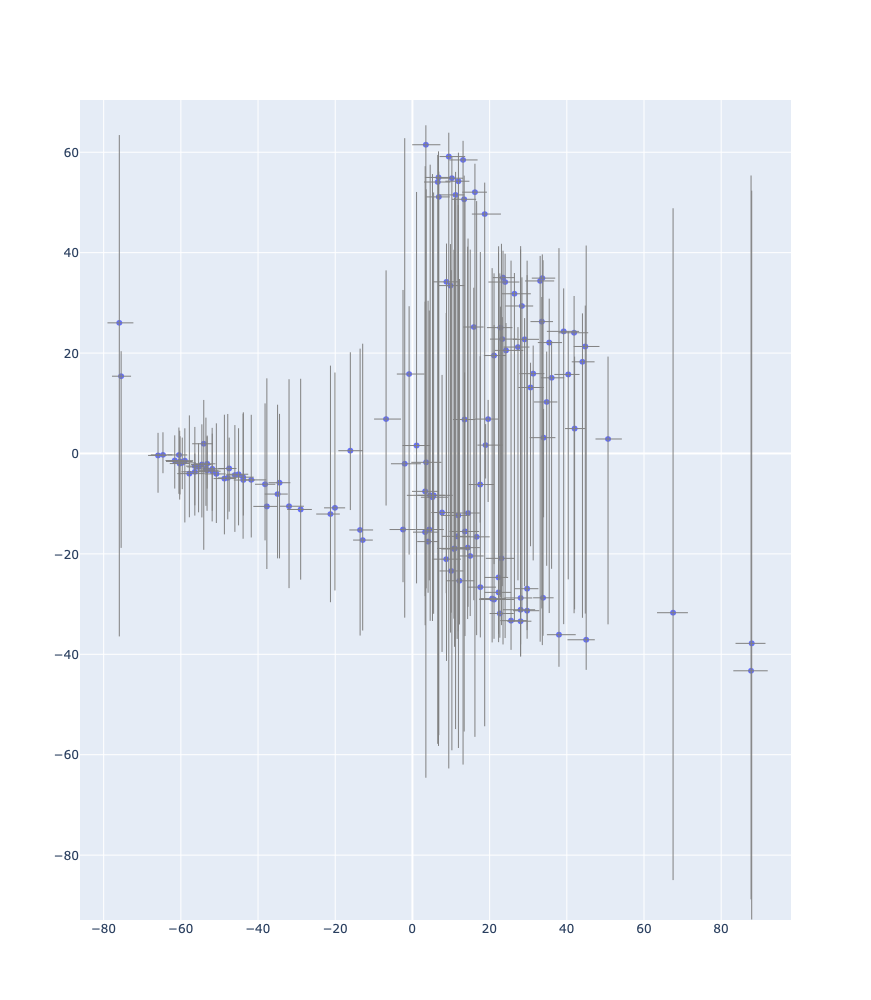

In [215]:
sample_scores = [md.doPCA(md.ranRelPct(asvs1))["scores"] for i in range(100)]
plotScoreDistribution(sample_scores)

In [216]:
# sample scores is the result of 100 PCAs, each array has 61 components for 62 samples. 
# (index =samples,cols= components, values are scores)
print(sample_scores[0].shape)
print(len(sample_scores))
sample_scores[0][0]

(131, 130)
100


array([-5.53199647e+01, -5.31722973e-01,  1.64293594e+01, -4.25694209e+00,
       -3.96457361e+00, -4.71253757e+00, -3.87363335e+00, -6.81406243e-01,
        3.40199892e+00,  2.62479917e-02,  1.33123169e+01, -2.33972573e+00,
       -3.90347155e+00, -5.14689470e+00, -6.89873470e+00, -8.97490968e+00,
        1.40128724e+01, -2.49249972e-01, -1.55939735e+00, -6.82406036e+00,
       -6.54377868e+00, -7.57403614e-01,  1.94178317e+00,  3.02016605e+00,
        4.48210408e+00,  4.96103632e+00, -2.66234210e+00, -5.09403067e+00,
        1.13783557e+01, -6.93917254e+00,  4.23401025e+00, -1.07852577e+00,
       -7.62058336e+00,  5.15878924e+00,  9.09248451e+00,  3.22130923e-01,
       -1.70776308e+00, -1.18863439e+00,  1.49851322e+00,  3.67269725e+00,
        7.62266007e+00, -8.47243886e+00, -6.83945924e-01,  1.62825984e+01,
       -1.17777351e+01,  2.20163924e+00,  4.85324375e+00,  1.09691719e+01,
       -2.32871307e+00,  5.56765192e+00, -1.20717266e+01, -3.83050819e+00,
        7.55924186e+00,  

### Loadings Distribution

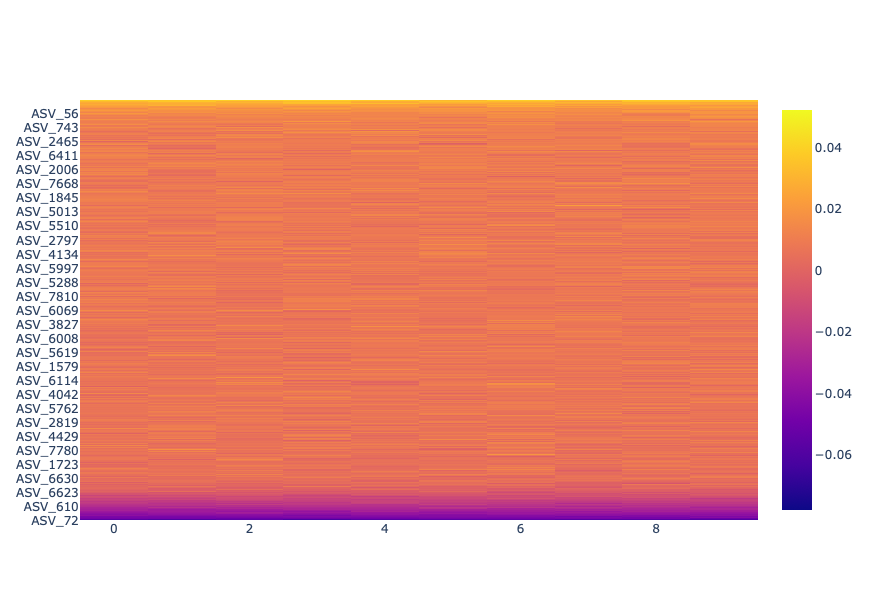

In [217]:
raw_loadings = [md.doPCA(md.ranRelPct(asvs1))["loadings"] for i in range(10)]
df = md.sortLoadings_std(raw_loadings, 0, asvs1.transpose().columns.values)
go.Figure(go.Heatmap(y = df.index[:-1], z = df.iloc[::-1]), go.Layout(autosize = False, width = 1000, height = 600))

In [218]:
# raw_loadings is the result of 10 PCAs, each array has 61 components for 2752 ASVs. 
# (index =ASVs,cols= components, values are scores)
print(raw_loadings[0].shape)
print(len(raw_loadings))
raw_loadings[0][0]

(7077, 130)
10


array([-0.003036  ,  0.06421739, -0.00691235, -0.0294079 , -0.02886646,
        0.02431202,  0.00781625,  0.01245089,  0.01016896, -0.01045709,
       -0.0052611 , -0.01564035, -0.00808041,  0.007149  , -0.00206026,
        0.01172121, -0.01243642, -0.00241288,  0.00133998,  0.00264231,
       -0.00284358,  0.00441092,  0.00498594,  0.00086028,  0.00359128,
        0.00468716,  0.00044166,  0.00822553, -0.0055465 , -0.00873287,
       -0.00296667,  0.0024771 ,  0.00284452, -0.0013362 , -0.00171498,
       -0.00600464, -0.00159433, -0.0009617 ,  0.0027576 ,  0.00381311,
        0.00383919, -0.00997425,  0.00058167,  0.00277748, -0.00047886,
       -0.0045383 , -0.00017183, -0.00121944, -0.00536433,  0.00570509,
       -0.00416505,  0.00528985, -0.00561675, -0.00423285, -0.01324965,
        0.01484277,  0.0051853 ,  0.00508037,  0.00294678, -0.00357333,
       -0.00353012, -0.00865041,  0.00412345,  0.00104813,  0.00175096,
        0.00729864,  0.00363544, -0.00428481,  0.00328182,  0.00

In [219]:
#pca_result_ld = pd.DataFrame(raw_loadings[0])
pca_result_ld = raw_loadings[0].copy()
#just look at first 10 PCAs
# first ten columns...
pca_result_ld = pca_result_ld[:,:10]
print(pca_result_ld.shape)
pca_result_ld

(7077, 10)


array([[-0.003036  ,  0.06421739, -0.00691235, ...,  0.01245089,
         0.01016896, -0.01045709],
       [-0.07397953,  0.06654722,  0.04941072, ...,  0.00046643,
         0.01955128, -0.00390924],
       [-0.01055398, -0.0037532 ,  0.00892744, ...,  0.01322346,
         0.0113893 , -0.01233687],
       ...,
       [ 0.00484019, -0.00067418,  0.0071071 , ..., -0.00297068,
         0.00632366, -0.00582088],
       [ 0.01152483,  0.00049016,  0.01373515, ...,  0.01764021,
         0.00526588, -0.01507092],
       [ 0.00863072,  0.0017601 ,  0.01468629, ..., -0.00492984,
        -0.00761365, -0.00225787]])

In [220]:
#pca_result_ld = pd.DataFrame(raw_loadings[0])
arr = raw_loadings[0].copy()
#just look at first 10 PCAs
# first ten columns...
arr = arr[:,:10]
print(arr.shape)
arr

(7077, 10)


array([[-0.003036  ,  0.06421739, -0.00691235, ...,  0.01245089,
         0.01016896, -0.01045709],
       [-0.07397953,  0.06654722,  0.04941072, ...,  0.00046643,
         0.01955128, -0.00390924],
       [-0.01055398, -0.0037532 ,  0.00892744, ...,  0.01322346,
         0.0113893 , -0.01233687],
       ...,
       [ 0.00484019, -0.00067418,  0.0071071 , ..., -0.00297068,
         0.00632366, -0.00582088],
       [ 0.01152483,  0.00049016,  0.01373515, ...,  0.01764021,
         0.00526588, -0.01507092],
       [ 0.00863072,  0.0017601 ,  0.01468629, ..., -0.00492984,
        -0.00761365, -0.00225787]])

### One Solution (Array first then dataframe) - KP

In [221]:
# Get interquartile range (lower and upper bounds)
def iqrThresh(x):
    quarts = np.quantile(x, [0.25, 0.75])
    iqr = np.diff(quarts)
    lower = quarts[0] - 1.5 * iqr
    upper = quarts[1] + 1.5 * iqr
    return [lower, upper]
    
iqrThresh(df.iloc[:,0])

[array([-0.00256693]), array([0.01765543])]

In [222]:
# Test if value is within IQR
def isOutlier(x):
    thresh = iqrThresh(x)
    return [xi <= thresh[0] or xi >= thresh[1] for xi in x]

type(isOutlier(df.iloc[:,0]))

list

In [223]:
# ARRAY VERSION - KP
arr = raw_loadings[0].copy()
#just look at first 10 PCAs
# first ten columns...
arr = arr[:,:10]
print(arr.shape)

outliers = [isOutlier(arr[:,i]) for i in range(arr.shape[1])]
print(len(outliers))
print(len(outliers[1]))
# outliers is a list of 10 lists for each PC, each one has 2752 values, 
# each one is a single-value numpy array of TRUE or FALSE if outlier
# in the end, for each of these PCs want list of ASVs that are TRUE outliers

# Now make it a dataframe
df = pd.DataFrame(data = outliers, columns=asvs1.index.tolist())

# get rid of interior array structure, just want TRUE/FALSE
for i in list(df):
    df[i]= df[i].str[0]

# Iterate over PCs, get outlier ASV IDs :
df = df.T
asv_out_lists = []
# for each PC...
for i in list(df):
    # get a dataframe that's just that PC, and just ASVs that are outliers
    dz = df[i]
    dz = dz.loc[dz==True]
    # create list of outlier ASV IDs
    asv_outs = dz.index.tolist()
    asv_outs = ','.join(asv_outs) #make it one string instead of a list
    asv_out_lists.append(asv_outs)


(7077, 10)
10
7077


In [224]:
# can make dataframe of output:
test = pd.DataFrame(index=list(df), data=asv_out_lists, columns=['ASV_outliers'])
test['Number_ASVs'] = test['ASV_outliers'].str.split(',').str.len()
test

ASV_outliers  Number_ASVs
0  ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_...          688
1  ASV_1,ASV_2,ASV_4,ASV_5,ASV_6,ASV_7,ASV_10,ASV...          650
2  ASV_1,ASV_2,ASV_4,ASV_9,ASV_11,ASV_12,ASV_13,A...          546
3  ASV_1,ASV_2,ASV_3,ASV_8,ASV_9,ASV_11,ASV_15,AS...          506
4  ASV_1,ASV_2,ASV_3,ASV_6,ASV_7,ASV_12,ASV_13,AS...          314
5  ASV_2,ASV_3,ASV_5,ASV_6,ASV_7,ASV_9,ASV_10,ASV...          236
6  ASV_5,ASV_7,ASV_12,ASV_24,ASV_25,ASV_30,ASV_36...          215
7  ASV_4,ASV_8,ASV_12,ASV_13,ASV_14,ASV_15,ASV_39...          184
8  ASV_9,ASV_19,ASV_26,ASV_28,ASV_62,ASV_81,ASV_8...          114
9  ASV_12,ASV_29,ASV_46,ASV_57,ASV_77,ASV_79,ASV_...          145

### Now want to apply this solution to multiple runs of the data

In [225]:
def get_ASV_outliers(arr, asv_names):
    outliers = [isOutlier(arr[:,i]) for i in range(arr.shape[1])]
    #print(len(outliers))
    #print(len(outliers[1]))
    # outliers is a list of 10 lists for each PC, each one has 2752 values, 
    # each one is a single-value numpy array of TRUE or FALSE if outlier
    # in the end, for each of these PCs want list of ASVs that are TRUE outliers

    # Now make it a dataframe
    df = pd.DataFrame(data = outliers, columns=asv_names)

    # get rid of interior array structure, just want TRUE/FALSE
    for i in list(df):
        df[i]= df[i].str[0]

    # Iterate over PCs, get outlier ASV IDs :
    df = df.T
    asv_out_lists = []
    # for each PC...
    for i in list(df):
        # get a dataframe that's just that PC, and just ASVs that are outliers
        dz = df[i]
        dz = dz.loc[dz==True]
        # create list of outlier ASV IDs
        asv_outs = dz.index.tolist()
        asv_outs = ','.join(asv_outs) #make it one string instead of a list
        asv_out_lists.append(asv_outs)
    # can make dataframe of output:
    test = pd.DataFrame(index=list(df), data=asv_out_lists, columns=['ASV_outliers'])
    test['Number_ASVs'] = test['ASV_outliers'].str.split(',').str.len()
    return(test)


In [226]:
arr_list = raw_loadings.copy()
# list of PCAs that were run
dfs= []
for arr in arr_list:
    df = get_ASV_outliers(arr, asvs1.index.tolist())
    dfs.append(df)

In [227]:
# Dataframe of results for 10 runs of PCAs (over 61 PCs from each PCA)
df = pd.concat(dfs, axis=1, keys=list(range(0, 10)))
df

0              \
                                          ASV_outliers Number_ASVs   
0    ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_...         688   
1    ASV_1,ASV_2,ASV_4,ASV_5,ASV_6,ASV_7,ASV_10,ASV...         650   
2    ASV_1,ASV_2,ASV_4,ASV_9,ASV_11,ASV_12,ASV_13,A...         546   
3    ASV_1,ASV_2,ASV_3,ASV_8,ASV_9,ASV_11,ASV_15,AS...         506   
4    ASV_1,ASV_2,ASV_3,ASV_6,ASV_7,ASV_12,ASV_13,AS...         314   
..                                                 ...         ...   
125  ASV_49,ASV_166,ASV_269,ASV_311,ASV_452,ASV_479...          50   
126  ASV_92,ASV_315,ASV_348,ASV_398,ASV_660,ASV_696...          76   
127  ASV_190,ASV_424,ASV_425,ASV_436,ASV_846,ASV_87...          53   
128  ASV_214,ASV_224,ASV_253,ASV_347,ASV_517,ASV_52...          73   
129  ASV_524,ASV_657,ASV_671,ASV_706,ASV_943,ASV_94...          50   

                                                     1              \
                                          ASV_outliers Number_ASVs   
0    ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_...         687   
1    ASV_1,ASV_2,ASV_4,ASV_9,ASV_11,ASV_14,ASV_15,A...         588   
2    ASV_1,ASV_2,ASV_4,ASV_5,ASV_6,ASV_7,ASV_10,ASV...         627   
3    ASV_1,ASV_2,ASV_3,ASV_8,ASV_9,ASV_11,ASV_15,AS...         510   
4    ASV_1,ASV_2,ASV_3,ASV_6,ASV_7,ASV_12,ASV_13,AS...         334   
..                                                 ...         ...   
125  ASV_72,ASV_245,ASV_494,ASV_578,ASV_661,ASV_858...          64   
126  ASV_30,ASV_135,ASV_340,ASV_594,ASV_687,ASV_767...          70   
127  ASV_109,ASV_138,ASV_216,ASV_246,ASV_256,ASV_28...          68   
128  ASV_12,ASV_114,ASV_119,ASV_283,ASV_349,ASV_467...          74   
129  ASV_234,ASV_277,ASV_469,ASV_510,ASV_602,ASV_63...          58   

                                                     2              \
                                          ASV_outliers Number_ASVs   
0    ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_...         674   
1    ASV_1,ASV_2,ASV_4,ASV_5,ASV_7,ASV_9,ASV_10,ASV...         662   
2    ASV_2,ASV_4,ASV_5,ASV_6,ASV_7,ASV_9,ASV_11,ASV...         444   
3    ASV_1,ASV_2,ASV_3,ASV_8,ASV_9,ASV_11,ASV_15,AS...         494   
4    ASV_1,ASV_2,ASV_3,ASV_6,ASV_7,ASV_12,ASV_13,AS...         327   
..                                                 ...         ...   
125  ASV_114,ASV_219,ASV_233,ASV_311,ASV_321,ASV_44...          60   
126  ASV_168,ASV_193,ASV_445,ASV_605,ASV_633,ASV_84...          49   
127  ASV_325,ASV_328,ASV_380,ASV_515,ASV_622,ASV_64...          49   
128  ASV_155,ASV_258,ASV_356,ASV_1115,ASV_1475,ASV_...          43   
129  ASV_269,ASV_646,ASV_701,ASV_854,ASV_993,ASV_10...          51   

                                                     3              \
                                          ASV_outliers Number_ASVs   
0    ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_...         708   
1    ASV_1,ASV_2,ASV_4,ASV_5,ASV_7,ASV_9,ASV_11,ASV...         656   
2    ASV_1,ASV_2,ASV_4,ASV_5,ASV_6,ASV_7,ASV_9,ASV_...         482   
3    ASV_1,ASV_2,ASV_3,ASV_8,ASV_9,ASV_11,ASV_15,AS...         492   
4    ASV_1,ASV_2,ASV_3,ASV_6,ASV_7,ASV_12,ASV_13,AS...         324   
..                                                 ...         ...   
125  ASV_80,ASV_245,ASV_509,ASV_570,ASV_658,ASV_759...          43   
126  ASV_211,ASV_584,ASV_630,ASV_655,ASV_732,ASV_79...          61   
127  ASV_163,ASV_175,ASV_326,ASV_368,ASV_468,ASV_58...          56   
128  ASV_179,ASV_298,ASV_380,ASV_412,ASV_439,ASV_70...          54   
129  ASV_318,ASV_542,ASV_764,ASV_852,ASV_1015,ASV_1...          50   

                                                     4              \
                                          ASV_outliers Number_ASVs   
0    ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_...         684   
1    ASV_1,ASV_2,ASV_4,ASV_5,ASV_7,ASV_9,ASV_10,ASV...         628   
2    ASV_2,ASV_4,ASV_5,ASV_6,ASV_7,ASV_9,ASV_11,ASV...         444   
3    ASV_1,ASV_2,ASV_3,ASV_8,ASV_9,ASV_11,ASV_15,AS...     

### Get Taxonomy of ASVs:

In [282]:
# merged data:
file = "../../../Data/merged_data/no_duplicates/Merged2018_16S_taxa_filtered.csv"
taxa = pd.read_csv(file, index_col=0)
taxa.head()

Kingdom          Phylum                Class              Order  \
ASV_1  Bacteria  Proteobacteria  Gammaproteobacteria  Thiomicrospirales   
ASV_2   Archaea   Crenarchaeota      Nitrososphaeria   Nitrosopumilales   
ASV_3  Bacteria  Proteobacteria  Alphaproteobacteria        SAR11_clade   
ASV_4  Bacteria    Bacteroidota          Bacteroidia   Flavobacteriales   
ASV_5  Bacteria  Proteobacteria  Alphaproteobacteria    Rhodobacterales   

                  Family                      Genus                   Species  
ASV_1      Thioglobaceae              SUP05_cluster                       NaN  
ASV_2  Nitrosopumilaceae  Candidatus_Nitrosopumilus  uncultured_euryarchaeote  
ASV_3            Clade_I                   Clade_Ia                       NaN  
ASV_4  Flavobacteriaceae              Tenacibaculum                       NaN  
ASV_5   Rhodobacteraceae                        NaN                       NaN

In [295]:
# Dataframe of results for 10 runs of PCAs (over 61 PCs from each PCA)
# Look at percent of times ASV is an outlier?

df = pd.concat(dfs, axis=1, keys=list(range(0, 10)))
#print(list(df))

# get rid of number of ASVs column
for i in list(range(0, 10)):
    df.drop([(i, 'Number_ASVs')], axis=1, inplace=True)
    
asv_IDs = asvs1.index.tolist()
tots = []
for asv in asv_IDs:
    # keep comma in order to differentiate ASV_1, from ASV_10, etc
    df1 = df.apply(lambda col: col.str.contains(asv+',', na=False), axis=1)
    df1[asv] = df1.sum(axis=1)
    tots.append(df1[[asv]])

test = pd.concat(tots,axis=1)
# Now have dataframe of how many replicates that ASV was an outlier, for each PC
test

ASV_1 ASV_2 ASV_3 ASV_4 ASV_5 ASV_6 ASV_7 ASV_8 ASV_9 ASV_10  ...  \
                                                                  ...   
0      10    10    10    10    10    10    10    10    10     10  ...   
1       9    10     0    10     9     2     9     0     9      7  ...   
2       5    10     0    10     9     7     9     1     9      2  ...   
3      10    10    10     0     0     0     1    10    10      0  ...   
4      10    10    10     0     0    10    10     0     0      0  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
125     0     0     0     0     0     0     0     0     0      0  ...   
126     0     0     0     0     0     0     0     0     0      0  ...   
127     0     0     0     0     0     0     0     0     0      0  ...   
128     0     0     0     0     0     0     0     0     0      0  ...   
129     0     0     0     0     0     0     0     0     0      0  ...   

    ASV_8120 ASV_8124 ASV_8125 ASV_8126 ASV_8127 ASV_8128 ASV_8129 ASV_8130  \
                                                                              
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
125        0        0        0        0        0        0        0        0   
126        0        0        0        0        0        0        0        0   
127        0        0        0        0        0        0        0        0   
128        0        0        0        0        0        0        0        0   
129        0        0        0        0        0        0        0        0   

    ASV_8132 ASV_8133  
                       
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          0        0  
..       ...      ...  
125        0        0  
126        0        0  
127        0        0  
128        0        0  
129        0        0  

[130 rows x 7077 columns]

In [296]:
print(len(asv_IDs))  # check correct number of ASVs/samples above

7077


In [297]:
print(taxa.index[:2])
taxa.head()

Index(['ASV_1', 'ASV_2'], dtype='object')


Kingdom          Phylum                Class              Order  \
ASV_1  Bacteria  Proteobacteria  Gammaproteobacteria  Thiomicrospirales   
ASV_2   Archaea   Crenarchaeota      Nitrososphaeria   Nitrosopumilales   
ASV_3  Bacteria  Proteobacteria  Alphaproteobacteria        SAR11_clade   
ASV_4  Bacteria    Bacteroidota          Bacteroidia   Flavobacteriales   
ASV_5  Bacteria  Proteobacteria  Alphaproteobacteria    Rhodobacterales   

                  Family                      Genus                   Species  
ASV_1      Thioglobaceae              SUP05_cluster                       NaN  
ASV_2  Nitrosopumilaceae  Candidatus_Nitrosopumilus  uncultured_euryarchaeote  
ASV_3            Clade_I                   Clade_Ia                       NaN  
ASV_4  Flavobacteriaceae              Tenacibaculum                       NaN  
ASV_5   Rhodobacteraceae                        NaN                       NaN

In [300]:
test = pd.concat(tots,axis=1)
# remove ASVs that never are outliers in any PC across PCAs:
test = test.T
#test['tot'] = test.sum(axis=1) # if want to look at number of runs and pcs that are outliers

test['tot'] = test.astype(bool).sum(axis=1) # if want to look at number of pcs that are outliers

test = test.loc[test['tot']>0]
test = test.sort_values('tot', ascending=False)
#print(test.index[:2])
# flatten multi-index
test = test.droplevel(1)
#print(test.index[:2])
test = test.join(taxa, how='left')
#test2 = test.loc[test.sum(axis=0) != 0]
#test2
print( 'DISPLAYING TOP OUTLIER ASVs BY NUMBER OF PCs:')
test[['tot', 'Phylum', 'Class', 'Order', 'Family','Genus']].head(n=20)


DISPLAYING TOP OUTLIER ASVs BY NUMBER OF PCs:


tot                         Phylum                          Class  \
ASV_155   69                 Proteobacteria            Alphaproteobacteria   
ASV_193   67                 Proteobacteria            Alphaproteobacteria   
ASV_386   63                 Proteobacteria            Alphaproteobacteria   
ASV_365   62                 Proteobacteria            Alphaproteobacteria   
ASV_447   61                  Cyanobacteria                 Cyanobacteriia   
ASV_496   60                   Bacteroidota                    Bacteroidia   
ASV_413   57                 Proteobacteria            Alphaproteobacteria   
ASV_232   57                 Proteobacteria            Alphaproteobacteria   
ASV_479   57  Marinimicrobia_(SAR406_clade)  Marinimicrobia_(SAR406_clade)   
ASV_605   57                 Proteobacteria            Alphaproteobacteria   
ASV_138   56                 Proteobacteria            Alphaproteobacteria   
ASV_584   56                 Proteobacteria            Alphaproteobacteria   
ASV_527   55                 Proteobacteria            Alphaproteobacteria   
ASV_200   55                 Proteobacteria            Gammaproteobacteria   
ASV_378   55                   Bacteroidota                    Bacteroidia   
ASV_209   54                 Proteobacteria            Gammaproteobacteria   
ASV_92    53                   Bacteroidota                    Bacteroidia   
ASV_303   52                   Bacteroidota                    Bacteroidia   
ASV_326   51                 Proteobacteria            Alphaproteobacteria   
ASV_175   51                 Proteobacteria            Gammaproteobacteria   

                                 Order                         Family  \
ASV_155                    SAR11_clade                            NaN   
ASV_193                    SAR11_clade                            NaN   
ASV_386             Puniceispirillales                   SAR116_clade   
ASV_365               Rhodospirillales        AEGEAN-169_marine_group   
ASV_447                Synechococcales                   Cyanobiaceae   
ASV_496                Chitinophagales                 Saprospiraceae   
ASV_413                    SAR11_clade                        Clade_I   
ASV_232                Rhodobacterales               Rhodobacteraceae   
ASV_479  Marinimicrobia_(SAR406_clade)  Marinimicrobia_(SAR406_clade)   
ASV_605                Rhodobacterales               Rhodobacteraceae   
ASV_138                Rhodobacterales               Rhodobacteraceae   
ASV_584                Rhodobacterales               Rhodobacteraceae   
ASV_527               Sphingomonadales              Sphingomonadaceae   
ASV_200                Alteromonadales         Pseudoalteromonadaceae   
ASV_378               Flavobacteriales              Flavobacteriaceae   
ASV_209                    Vibrionales                   Vibrionaceae   
ASV_92                Flavobacteriales              Flavobacteriaceae   
ASV_303               Flavobacteriales              Flavobacteriaceae   
ASV_326                    SAR11_clade                        Clade_I   
ASV_175                Alteromonadales         Pseudoalteromonadaceae   

                                 Genus  
ASV_155                            NaN  
ASV_193                            NaN  
ASV_386    Candidatus_Puniceispirillum  
ASV_365        AEGEAN-169_marine_group  
ASV_447           Synechococcus_CC9902  
ASV_496                     uncultured  
ASV_413                       Clade_Ia  
ASV_232                            NaN  
ASV_479  Marinimicrobia_(SAR406_clade)  
ASV_605                            NaN  
ASV_138                  Planktomarina  
ASV_584                            NaN  
ASV_527                            NaN  
ASV_200              Pseudoalteromonas  
ASV_378                            NaN  
ASV_209                            NaN  
ASV_92                             NaN  
ASV_303               NS4_marine_group  
ASV_326                            NaN  
ASV_175         

### Question: Which Orders have the highest % of ASVs that are outliers in determining community composition?
(The answer is almost all of the ASVs are outliers at least once, so let's limit to first 3 PCs)

In [303]:
# get total number of ASVs in Class, Order group.
df = taxa.copy()
df['Total_ASVs'] = 1
df = df.groupby(['Class', 'Order']).sum()
df

/var/folders/5v/h4s_0pz17yb6f6krsxkzr5dw000b65/T/ipykernel_69265/108544011.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Total_ASVs
Class          Order                                   
028H05-P-BN-P5 028H05-P-BN-P5                         5
ABY1           Candidatus_Komeilibacteria             1
               Candidatus_Magasanikbacteria           3
Acidimicrobiia Actinomarinales                       23
               Microtrichales                        46
...                                                 ...
WOR-1          WOR-1                                  1
WPS-2          WPS-2                                  1
bacteriap25    bacteriap25                            1
uncultured     uncultured                             4
vadinHA49      vadinHA49                              1

[175 rows x 1 columns]

In [313]:
test = pd.concat(tots,axis=1)
# remove ASVs that never are outliers in any PC across PCAs:
test = test.T
# limit number of PCs
test = test.loc[:,0:2]

test['tot'] = test.astype(bool).sum(axis=1) # if want to look at number of pcs that are outliers

test = test.loc[test['tot']>0]
test = test.sort_values('tot', ascending=False)
# flatten multi-index
test = test.droplevel(1)
test = test.join(taxa, how='left')
test['outliers'] = 1
test = test[['outliers', 'Class', 'Order']]
test = test.groupby(['Class','Order']).sum()

#print( 'DISPLAYING TOP OUTLIER ASVs BY NUMBER OF PCs:')
#test[['tot', 'Phylum', 'Class', 'Order', 'Family','Genus']].head(n=20)
test = test.join(df, how='left')
test['Percent_outlier'] = (test['outliers'] / test['Total_ASVs']) *100
test = test.sort_values('Percent_outlier', ascending=False)
test.head(n=20)

outliers  Total_ASVs  \
Class               Order                                         
Chitinivibrionia    Chitinivibrionales            1           1   
Gammaproteobacteria Thiohalorhabdales             1           1   
Dadabacteriia       Dadabacteriales               1           1   
Gammaproteobacteria Ga0077536                     3           4   
Thermoplasmata      Marine_Group_II              33          49   
Gammaproteobacteria Tenderiales                   2           3   
PAUC34f             PAUC34f                       5           9   
Gammaproteobacteria Steroidobacterales            6          11   
Bacteroidia         Sphingobacteriales            8          15   
Acidimicrobiia      Microtrichales               24          46   
Nitrososphaeria     Nitrosopumilales             56         109   
Thermoanaerobaculia Thermoanaerobaculales         1           2   
Polyangia           Polyangiales                  6          12   
Kiritimatiellae     Kiritimatiellales             1           2   
Subgroup_26         Subgroup_26                   2           4   
Gammaproteobacteria AT-s2-59                      1           2   
Hydrogenedentia     Hydrogenedentiales            1           2   
Verrucomicrobiae    Pedosphaerales                2           4   
Alphaproteobacteria Kiloniellales                 1           2   
Thermoplasmata      Thermoplasmata                8          17   

                                           Percent_outlier  
Class               Order                                   
Chitinivibrionia    Chitinivibrionales          100.000000  
Gammaproteobacteria Thiohalorhabdales           100.000000  
Dadabacteriia       Dadabacteriales             100.000000  
Gammaproteobacteria Ga0077536                    75.000000  
Thermoplasmata      Marine_Group_II              67.346939  
Gammaproteobacteria Tenderiales                  66.666667  
PAUC34f             PAUC34f                      55.555556  
Gammaproteobacteria Steroidobacterales           54.545455  
Bacteroidia         Sphingobacteriales           53.333333  
Acidimicrobiia      Microtrichales               52.173913  
Nitrososphaeria     Nitrosopumilales             51.376147  
Thermoanaerobaculia Thermoanaerobaculales        50.000000  
Polyangia           Polyangiales                 50.000000  
Kiritimatiellae     Kiritimatiellales            50.000000  
Subgroup_26         Subgroup_26                  50.000000  
Gammaproteobacteria AT-s2-59                     50.000000  
Hydrogenedentia     Hydrogenedentiales           50.000000  
Verrucomicrobiae    Pedosphaerales               50.000000  
Alphaproteobacteria Kiloniellales                50.000000  
Thermoplasmata      Thermoplasmata               47.058824